In [154]:
# preamble

import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
e = np.e
pi = np.pi

In [155]:
# warnings

import warnings
warnings.filterwarnings('ignore') # comment if u want to see the warnings

## ATP1 (30/8)

In [156]:
# generic functions

def derivative(func, x, h=1e-10):
    '''
    Method to find the approximate derivative of a function f at point x.
    
    :param func: function to be differentiated
    :param x: point to be evaluated
    :return: the approximate derivative of f at x
    '''
    return (func(x + h) - func(x))/h

def calculate_L(func, min_interval, max_interval):
    '''
    Method to find the Lipschitz constant of a function f in an interval [a, b].
    :param func: function to be evaluated
    :param min_interval: left endpoint of the interval
    :param max_interval: right endpoint of the interval
    :return: the Lipschitz constant of f in [a, b]
    '''
    interval = [min_interval, max_interval]
    max_derivative = max(abs(derivative(func, x)) for x in interval)

    return max_derivative

def calculate_m(func, min_interval, max_interval):
    '''
    Method to find the minimum of the derivative of a function f in an interval [a, b].
    :param func: function to be evaluated
    :param min_interval: left endpoint of the interval
    :param max_interval: right endpoint of the interval
    :return: the minimum of the derivative of f in [a, b]
    '''

    interval = [min_interval, max_interval]
    min_derivative = min(abs(derivative(func, x)) for x in interval)

    return min_derivative

In [157]:
# fixed point method

def fixed_point(func, 
                min_interval, 
                max_interval, 
                delta, 
                max_iterations):
    ''' 
    Implementation of the fixed point method, to find the root of a function f.
    :param func: function to be solved
    :param min_interval: minimum interval
    :param max_interval: maximum interval
    :param delta: error
    :param max_iterations: maximum number of iterations
    :return: root of the function
    '''
    x = (min_interval+max_interval)/2.0
    L = calculate_L(func, min_interval, max_interval)
    eps = ((1 - L)/L)*delta

    for i in range(1, max_iterations):
        x_next = func(x)
        if abs(x_next - x) < eps:
            return x_next, i
        x = x_next
        
    return x, -1

In [158]:
# newton's method

def newton(g, 
            dg, 
            min_interval, 
            max_interval, 
            delta, 
            max_iterations):
    ''' 
    Implementation of Newton's method, to find the root of a function f.
    :param g: function to be solved
    :param dg: derivative of g
    :param min_interval: minimum interval
    :param max_interval: maximum interval
    :param delta: error
    :param max_iterations: maximum number of iterations
    :return: root, number of iterations
    '''
    x = (min_interval+max_interval)/2.0
    m = calculate_m(g, min_interval, max_interval)
    M = calculate_L(dg, min_interval, max_interval)
    eps = np.sqrt(((2*m)/M)*delta)

    for i in range(1, max_iterations):
        x_next = x-g(x)/dg(x)
        if abs(x_next - x) < eps:
            return x_next, i
        x = x_next
        
    return x, -1

In [159]:
# bisection method

def bisection(func, min_interval, max_interval, delta, max_iterations):
    '''
    Implementation of the bisection method, to find the root of a function f.
    :param func: function to find root of
    :param min_interval: minimum interval
    :param max_interval: maximum interval
    :param delta: tolerance
    :param max_iterations: maximum number of iterations
    :return: root, number of iterations
    '''
    a = min_interval
    b = max_interval
    for i in range(1, max_iterations):
        c = (a+b)/2.0
        if func(c) == 0 or (b-a)/2.0 < delta:
            return c, i
        elif func(c)*func(a) < 0:
            b = c
        else:
            a = c

    return (a+b)/2.0, -1

### Question 1

In [160]:
# question function

def f(x):
    return x*e**(x/2)-1.2*x-5

def df(x):
    return e**(x/2)+(x/2)*e**(x/2)-1.2

# iteration functions

def phi_a(x):
    return 5/(e**(x/2)-1.2)

def phi_b(x):
    return (1.2*x+5)/(e**(x/2))

def phi_c(x):
    return x*(e**(x/2)-0.2)-5

In [161]:
# test parameters for phi_b

min_interval = 2.1
max_interval = 2.7
delta = 5e-04
max_iterations = 10000

In [162]:
# phi_b satisfies fixed_point condition and L condition

L = calculate_L(phi_b, min_interval, max_interval)
m = min(phi_b(x) for x in [min_interval,max_interval])
M = max(phi_b(x) for x in [min_interval,max_interval])

L, m, M

(0.8958389585700388, 2.136139747722146, 2.631531873315888)

In [163]:
# root with fixed point method

root, i = fixed_point(func=phi_b, 
                      min_interval=min_interval, 
                      max_interval=max_interval, 
                      delta=delta, 
                      max_iterations=max_iterations)

print(f"The root {root} was found with {i} iterations.")

The root 2.385470371653961 was found with 34 iterations.


In [164]:
# root with newton's method

root, i = newton(g=f, 
                 dg=df, 
                 min_interval=min_interval, 
                 max_interval=max_interval, 
                 delta=delta, 
                 max_iterations=max_iterations)

print(f"The root {root} was found with {i} iterations.")

The root 2.385537861325117 was found with 1 iterations.


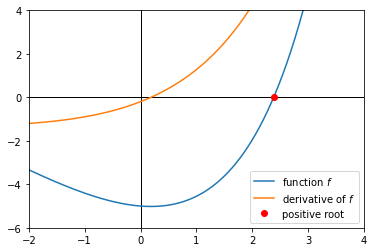

In [165]:
# plot question 1

x = np.arange(-2, 3.5, 0.01)
y = [f(x) for x in x]

df = [derivative(f, x) for x in x]

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

ax = plt.gca()
ax.plot(x, y, label=r'function $f$')
ax.plot(x, df, label=r'derivative of $f$')
plt.plot(root, 0, 'ro', label='positive root')
plt.xlim(-2, 4)
plt.ylim(-6, 4)
ax.legend()
plt.show()

### Question 2

In [166]:
# general length of curves

def integrand_length(y, x):
    return np.sqrt(1 + derivative(func=y, x=x)**2)

def length(integrand_length, lower_limit, upper_limit):
    result, error = integrate.quad(func=integrand_length, 
                                   a=lower_limit, 
                                   b=upper_limit)
    return result, error

# cable specific

def cable(x, alpha=1, beta=1):
    return alpha+beta*np.cosh(x/alpha)

def cable_integrand_length(x):
    return integrand_length(y=cable, x=x)

In [168]:
# calculating the length of the cable

cable_length, error = length(integrand_length=cable_integrand_length, 
                             lower_limit=-1, 
                             upper_limit=1)

print(f"The approximate length of the cable is {cable_length} with error {error}")

The approximate length of the cable is 2.3504024470965437 with error 1.8712200192502773e-06


In [ ]:
# another code

def z(x, a):
    return np.sqrt(1 + ((5-a)**2/a**2)*(np.sinh(x/a))**2)

def z_x(a):
    integrand = lambda x: z(x, a)
    integral_result, _ = integrate.quad(integrand, -9, 9)
    return integral_result

def F(a):
    return z_x(a)-19

In [ ]:
# plot question 2 F

t = np.arange(2, 20, 0.01)
y_F = [F(t) for t in t]

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

ax = plt.gca()
ax.plot(t, y_F, label=r'function $F$')
plt.xlim(3, 10)
plt.ylim(-2, 2)
plt.legend()
plt.show()

In [ ]:
# finding the infos needed for q2

poles_position = 9 # or 9, whatever
alpha_q2, iterations_alpha_q2 = bisection(func=F, 
                                          min_interval=3, 
                                          max_interval=5, 
                                          delta=5e-04, 
                                          max_iterations=1000)
beta_q2 = 5-alpha_q2
min_height = alpha_q2+beta_q2*np.cosh(9/alpha_q2)

print(f"alpha = {alpha_q2}, beta = {beta_q2}, min_height = {min_height}")

In [ ]:
# plot question 2 F

domain = np.arange(-9, 9, 0.01)

y_cable = [alpha_q2+beta_q2*np.cosh(x/alpha_q2) for x in domain]

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

ax = plt.gca()
ax.plot(domain, y_cable)

plt.vlines(x = -9, ymin = 0, ymax = min_height,
           colors = 'purple',
           label = r'height$\approx 7.483$ m')

plt.vlines(x = 9, ymin = 0, ymax = min_height,
           colors = 'purple')

plt.vlines(x = 0, ymin = 0, ymax = 5,
           colors = 'red',
           label = 'tree restriction')

plt.xlim(-12, 12)
plt.ylim(-2, 10)
ax.legend()
plt.show()

## Question 3

In [ ]:
def a_function(x):
    return np.sin(x)
    
def a_derivative(x):
    return np.cos(x)

def b_function(x):
    return np.cos(x) + 1

def b_dericative(x):
    return -1*np.sin(x)


approx_a, iterations_a = newton(
    g=a_function, 
    dg=a_derivative, 
    min_interval=3, 
    max_interval=4, 
    delta=1e-3, 
    max_iterations=100
)

approx_b, iterations_b = newton(
    g=b_function, 
    dg=b_dericative, 
    min_interval=3, 
    max_interval=4, 
    delta=1e-3, 
    max_iterations=100
)

# for i in range(6):
#     for j in range(i, 6):
#         approx_b, iterations_b = newton(g=b_function, dg=b_dericative, min_interval=i, max_interval=j, delta=10**(-3), max_iterations=100)
#         if (iterations_b > 0):
#             print(f"The root {round(approx_b, 5)} was found with {iterations_b} iterations with min={i} and max={j}.")

print(f"The root {approx_a} was found with {iterations_a} iterations.")
print(f"The root {approx_b} was found with {iterations_b} iterations.")

The root 3.1415940652246253 was found with 2 iterations.
The root 3.1526328825076755 was found with 5 iterations.


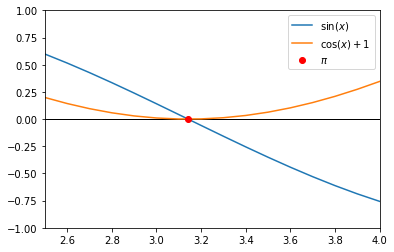

In [ ]:
# plot question 3

domain_q3 = np.arange(0, 10, 0.1)

y_a = [a_function(x) for x in domain_q3]
y_b = [b_function(x) for x in domain_q3]

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

ax = plt.gca()
ax.plot(domain_q3, y_a, label=r'$\sin(x)$')
ax.plot(domain_q3, y_b, label=r'$\cos(x)+1$')
plt.plot(pi, 0, 'ro', label=r'$\pi$')
plt.xlim(2.5, 4)
plt.ylim(-1,1)
ax.legend()
plt.show()

## Question 4

In [ ]:
def f(x):
    return e**(x)*(x-1) - e**(-x)*(x+1)

approx, iterations = bisection(
    func=f, 
    min_interval=0, 
    max_interval=4, 
    delta=10**(-8), 
    max_iterations=100
)

print(f"The root {approx} was found with {iterations} iterations.")

## Question 6

In [ ]:
def f(h, r=1, v=0.5):
    return (pi*(h**2)*(3*r-h))/3 - v

def df(h, r=1):
    return 6*h*pi*r - 3*(h**2)*pi


approx_a, iterations_a = newton(
    g=f, 
    dg=df, 
    min_interval=0.25, 
    max_interval=0.5, 
    delta=10**(-6), 
    max_iterations=100
)

approx_b, iterations_b = newton(
    g=f, 
    dg=df, 
    min_interval=2.5, 
    max_interval=3, 
    delta=10**(-6), 
    max_iterations=100
)

print(f"The root {approx_a} was found with {iterations_a} iterations.")
print(f"The root {approx_b} was found with {iterations_b} iterations.")

In [ ]:
# plot question 6

x = np.arange(0, 4, 0.1)
y = [f(x) for x in x]

x1 = np.arange(0.25, 0.5, 0.1)
y1 = [f(x) for x in x1]

x2 = np.arange(2.5, 3, 0.1)
y2 = [f(x) for x in x2]

df = [derivative(f, x) for x in x]

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

ax = plt.gca()
ax.plot(x, y, label=r'function $f$')
ax.plot(x1, y1, label=r'$f$ in $[0.25, 0.5]$')
ax.plot(x2, y2, label=r'$f$ in $[2.5, 3]$')
plt.plot(approx_a, 0, 'ro', label='positive root')
plt.plot(approx_b, 0, 'ro')
plt.xlim(-2, 4)
plt.ylim(-6, 4)
ax.legend()
plt.show()